In [1]:
import numpy as np
import matplotlib.pyplot as plt

x=[2,6,10,14]
y=[5,4,11,14]
ux = np.mean(x)
uy = np.mean(y)
print("Means of x and y")
print(ux,uy)


Means of x and y
8.0 8.5


In [2]:

var_x = 0
var_y = 0
for i in range(0,4):
    var_x += (x[i] - ux) ** 2
    var_y += (y[i] - uy) ** 2

std_dev_x = (var_x / 4) ** 0.5
std_dev_y = (var_y / 4) ** 0.5
print("Standard deviation of X and Y")
print(std_dev_x,std_dev_y)



Standard deviation of X and Y
4.47213595499958 4.153311931459037


In [3]:

for i in range(0,4):
    x[i]=(x[i]-ux)/(std_dev_x)
    y[i]=(y[i]-uy)/(std_dev_y)
    
X_standardised = np.array([
    [x[0], y[0]],
    [x[1], y[1]],
    [x[2], y[2]],
    [x[3], y[3]]
])
print("X_standardised")
print(X_standardised)


X_standardised
[[-1.34164079 -0.84270097]
 [-0.4472136  -1.08347268]
 [ 0.4472136   0.60192927]
 [ 1.34164079  1.32424438]]


In [4]:

Cov_matrix= (1/4)*(np.dot(X_standardised.T,X_standardised))
print("Covariance Matrix:")
print(Cov_matrix)

Covariance Matrix:
[[1.         0.91524923]
 [0.91524923 1.        ]]


In [13]:
cov_matrix = np.array([[1, 0.91524923],
                       [0.91524923, 1]])
eigen_val,eigen_vec= np.linalg.eig(cov_matrix)

print("eigen_value")
print(eigen_val)
print("eigen_vector")
print(eigen_vec)

eigen_value
[1.91524923 0.08475077]
eigen_vector
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [50]:
PC=X_standardised@eigen_vec[1]
projected_points = np.outer(PC,eigen_vec[1])
PC

array([-1.54456287, -1.08235864,  0.74185603,  1.88506548])

In [17]:
X_reduced= X_standardised@eigen_vec[1].T
X_reduced

array([-1.54456287, -1.08235864,  0.74185603,  1.88506548])

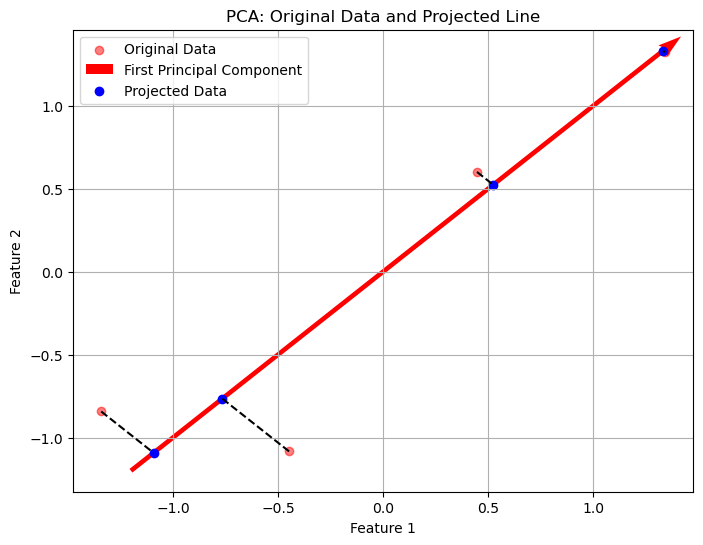

In [48]:
plt.figure(figsize=(8, 6))
plt.scatter(X_standardised[:, 0], X_standardised[:, 1], color='red', alpha=0.5, label='Original Data')

plt.quiver(-1.2, -1.2, eigen_vec[1][0], eigen_vec[1][1], angles='xy', scale_units='xy', scale=0.27, color='red', label='First Principal Component')

plt.scatter(projected_points[:, 0], projected_points[:, 1], color='blue', label='Projected Data')


# Draw lines from original data points to their projections
for i in range(len(X_standardised)):
    plt.plot([X_standardised[i, 0], projected_points[i, 0]], [X_standardised[i, 1], projected_points[i, 1]], 'k--')


plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('PCA: Original Data and Projected Line')
plt.grid(True)
# plt.savefig("ml_fig_4")
plt.show()